In [2]:
# ==================== 📂 Mount Drive ====================
from google.colab import drive
drive.mount('/content/drive')

# ==================== 📂 Imports ====================
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# ==================== 📂 Paths & Parameters ====================
project_path = "/content/drive/MyDrive/Brain_Tumor_Detection_Project/BrainTumorMRIDataset"
train_dir = os.path.join(project_path, "Training")
test_dir = os.path.join(project_path, "Testing")
IMG_SIZE = 224
BATCH_SIZE = 32
model_name = "ResNet50"

# ==================== 🧪 Data Generators ====================
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Mounted at /content/drive
Found 5722 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 1547s 9s/step - accuracy: 0.7634 - loss: 1.3039 - val_accuracy: 0.9115 - val_loss: 0.2216
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 203ms/step - accuracy: 0.9143 - loss: 0.2289 - val_accuracy: 0.9336 - val_loss: 0.1639
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - accuracy: 0.9472 - loss: 0.1447 - val_accuracy: 0.9519 - val_loss: 0.1243
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 202ms/step - accuracy: 0.9644 - loss: 0.0983 - val_accuracy: 0.9451 - val_loss: 0.1523
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 200ms/step - accuracy: 0.9683 - loss: 0.0796 - val_accuracy: 0.9558 - val_loss: 0.1165
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 203ms/step - accuracy: 0.9774 - loss: 0.0656 - val_accuracy: 0.9649 - val_loss: 0.0888
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 37s 205ms/step - accuracy: 0.9785 - loss: 0.0611 - val_accuracy: 0.9573 - val_loss: 0.1071
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 220ms/step - accuracy: 0.9793 - loss: 0.

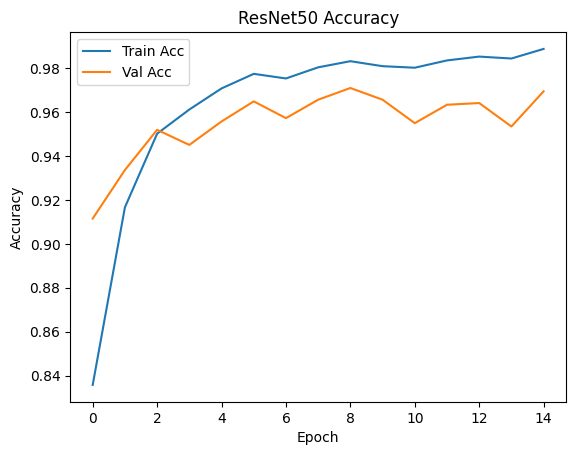

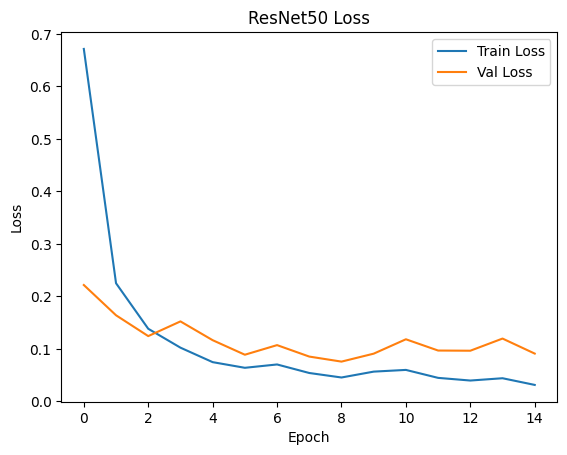

41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step


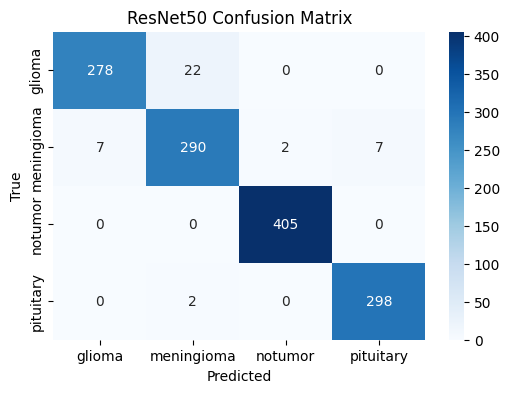

In [3]:


# ==================== 📜 Model Definition ====================
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# ==================== 🔁 Train ====================
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=15
)

# ==================== 🧪 Evaluate ====================
loss, acc = model.evaluate(test_generator)
print(f"{model_name} Test Accuracy: {acc*100:.2f}%")

# Save model
model.save(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/models/{model_name}_brain_tumor_model.keras")

# Save evaluation results
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
result_str = (
    f"Train Accuracy: {train_acc*100:.2f}%\n"
    f"Train Loss: {train_loss:.4f}\n"
    f"Test Accuracy: {acc*100:.2f}%\n"
    f"Test Loss: {loss:.4f}\n"
)
with open(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_evaluation_results.txt", "w") as f:
    f.write(result_str)

# ==================== 📊 Plots ====================
# Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title(f'{model_name} Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_accuracy_plot.png")
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f'{model_name} Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_loss_plot.png")
plt.show()

# ==================== 📈 Confusion Matrix & Report ====================
# Get predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
with open(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_classification_report.txt", "w") as f:
    f.write(report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"{model_name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_confusion_matrix.png")
plt.show()
plt.close()
